In [2]:
import sys
read = sys.stdin.buffer.read
import time
from heapq import heappop, heappush
import random
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [52]:
def visualize(res, xy, r):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    
    base = patches.Rectangle(xy=(0,0), width=10000, height=10000, color='white')
    ax.add_patch(base)
    
    n = len(r)
    for i in range(n):
        ri = r[i]
        a,b,c,d = res[i]
        x,y = xy[i]
        ab = (a,b)
        wid = c-a
        hei = d-b
        si = wid*hei
        p = 1-(1-min(ri,si)/max(ri,si))**2
        
        
        box = patches.Rectangle(xy=ab, width=wid, height=hei,
                                color=plt.cm.bwr(p), alpha=0.7, label=int(p*100),
                                edgecolor='black')
        ax.add_patch(box)
        
        point = patches.Circle(xy = (x,y), radius=50)
        ax.add_patch(point)
            
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    
    plt.show()

In [53]:
def initialize(n,xy,r):
    res = []
    it = iter(xy)
    score_i = [0] * n
    for i in range(n):
        x,y = xy[i]
        ri = r[i]
        res.append([x,y,x+1,y+1])
        si = 1
        score_i[i] = 1 - (1 - min(ri,si)/max(ri,si))**2
        
    return res,score_i

In [54]:
def initialize_on_the_way(n,xy,r,res0,p0,p1):
    res = []
    score_i = [0] * n
    for i in range(n):
        x,y = xy[i]
        ri = r[i]
        a0,b0,c0,d0 = x,y,x+1,y+1
        a,b,c,d = res0[i]

        if random.random() > 0.7:
            res.append([a,b,c,d])
            continue
        a = a0 - int((a0-a) * (random.random() * (p1-p0) +p0))
        b = b0 - int((b0-b) * (random.random() * (p1-p0) +p0))
        c = c0 + int((c-c0) * (random.random() * (p1-p0) +p0))
        d = d0 + int((d-d0) * (random.random() * (p1-p0) +p0))
        res.append([a,b,c,d])
        si = (c-a) * (d-b)
        score_i[i] = 1 - (1 - min(ri,si)/max(ri,si))**2
    return res,score_i

In [55]:
# def able_extend2(x, r, res, able_exs, change_log, last_change):
#     # 計算量改善。前回からそんなに経っていない場合、直近で動かした奴だけ再確認する。
#     n = len(r)
#     a,b,c,d = res[x]
#     ri = r[x]
# #     able_x = ri//(d-b) -(c-a)
# #     able_y = ri//(c-a) -(d-b)

#     able_ex = able_exs[x][:] # up,left,down,right
#     if len(change_log) - last_change[x] - 1 < n:
#         done = [0] * n
#         for i in range(last_change[x]+1, len(change_log)):
#             i = change_log[i]
#             if done[i] == 1:
#                 continue
#             done[i] = 1
#             if i == x:
#                 continue
#             ai,bi,ci,di = res[i]
#             # up
#             if b < di and bi < d and ci <= a:
#                 able_ex[0] = min(able_ex[0], a - ci)
#             # down
#             elif b < di and bi < d and c <= ai:
#                 able_ex[2] = min(able_ex[2], ai - c)
#             # left
#             elif a < ci and ai < c and di <= b:
#                 able_ex[1] = min(able_ex[1], b - di)
#             # right
#             elif a < ci and ai < c and d <= bi:
#                 able_ex[3] = min(able_ex[3], bi - d)
#     else:
    
#         for i in range(n):
#             if i == x:
#                 continue
#             ai,bi,ci,di = res[i]
#             # up
#             if b < di and bi < d and ci <= a:
#                 able_ex[0] = min(able_ex[0], a - ci)
#             # down
#             elif b < di and bi < d and c <= ai:
#                 able_ex[2] = min(able_ex[2], ai - c)
#             # left
#             elif a < ci and ai < c and di <= b:
#                 able_ex[1] = min(able_ex[1], b - di)
#             # right
#             elif a < ci and ai < c and d <= bi:
#                 able_ex[3] = min(able_ex[3], bi - d)
#     max_num = max(able_ex)
#     if max_num <= 0:
#         return able_ex,-1
#     start_i = random.randint(-3,0)
#     for i in range(start_i, start_i+4):
#         if able_ex[i] == max_num:
#             return able_ex,i%4

In [56]:
def able_extend(x, r, res):
    # O(4n)
    n = len(r)
    a,b,c,d = res[x]
    ri = r[x]
    able_x = ri//(d-b) -(c-a)
    able_y = ri//(c-a) -(d-b)

    able_ex = [min(a, able_x),
           min(b, able_y),
           min(10000-c, able_x),
           min(10000-d, able_y)] # up,left,down,right
    for i in range(n):
        if i == x:
            continue
        ai,bi,ci,di = res[i]
        # up
        if b < di and bi < d and ci <= a:
            able_ex[0] = min(able_ex[0], a - ci)
        # down
        elif b < di and bi < d and c <= ai:
            able_ex[2] = min(able_ex[2], ai - c)
        # left
        elif a < ci and ai < c and di <= b:
            able_ex[1] = min(able_ex[1], b - di)
        # right
        elif a < ci and ai < c and d <= bi:
            able_ex[3] = min(able_ex[3], bi - d)
    max_num = max(able_ex)
    if max_num <= 0:
        return able_ex,-1
    start_i = random.randint(-3,0)
    for i in range(start_i, start_i+4):
        if able_ex[i] == max_num:
            return able_ex,i%4

In [57]:
# def extend_4edge_on_the_way(i, r, res, ex_cnt):
#     # 4辺まとめて処理する
#     n = len(r)
#     ri = r[x]
#     able_change = False
    
#     idxs = random.sample(range(4), k=4)
    
#     for idx in idxs:
        
#         a,b,c,d = res[x]
#         able_x = ri//(d-b) -(c-a)
#         able_y = ri//(c-a) -(d-b)
#         able_ex = [min(a, able_x),
#                    min(b, able_y),
#                    min(10000-c, able_x),
#                    min(10000-d, able_y)] # up,left,down,right
        
#         for i in range(n):
#             if i == x:
#                 continue
#             ai,bi,ci,di = res[i]
#             if idx == 0:
#                 # up
#                 if b < di and bi < d and ci <= a:
#                     able_ex[0] = min(able_ex[0], a - ci)
#             elif idx == 2:
#                 # down
#                 if b < di and bi < d and c <= ai:
#                     able_ex[2] = min(able_ex[2], ai - c)
#             elif idx == 1:
#                 # left
#                 if a < ci and ai < c and di <= b:
#                     able_ex[1] = min(able_ex[1], b - di)
#             elif idx == 3:
#                 # right
#                 if a < ci and ai < c and d <= bi:
#                     able_ex[3] = min(able_ex[3], bi - d)
        
#         if able_ex[idx] == 0:
#             continue
#         able_change = True
            
#         # ここは要調整
#         if ex_cnt[x] < 4:
#             ex_width = able_ex[idx]**0.5
#             rand = random.random()*2 + 0.5
#             ex_width = math.ceil(ex_width * rand)
#         elif ex_cnt[x] < 10:
#             ex_width = able_ex[idx]**0.7
#             rand = random.random()*3 + 1
#             ex_width = math.ceil(ex_width * rand)
#         elif ex_cnt[x] < 15:
#             rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[x]-14)//2)
#             ex_width = math.ceil(able_ex[idx] * rand)
#         else:
#             rand = random.random() * 0.1 + 0.9
#             ex_width = math.ceil(able_ex[idx] * rand )

#         # 最大値を超えないように調整
#         ex_width = min(ex_width, able_ex[idx])

#         # 値の更新
#         if idx < 2:
#             res[x][idx] -= ex_width
#         else:
#             res[x][idx] += ex_width
    
#     if able_change == False:
#         return res,-1
#     return res ,1
        

In [99]:
def extend_4edge(x, r, res, ex_cnt):
    # 4辺まとめて処理する
    n = len(r)
    ri = r[x]
    able_change = False
    
    idxs = random.sample(range(4), k=4)
    
    for idx in idxs:
        
        a,b,c,d = res[x]
        able_x = ri//(d-b) -(c-a)
        able_y = ri//(c-a) -(d-b)
        able_ex = [min(a, able_x),
                   min(b, able_y),
                   min(10000-c, able_x),
                   min(10000-d, able_y)] # up,left,down,right
        
        for i in range(n):
            if i == x:
                continue
            ai,bi,ci,di = res[i]
            if idx == 0:
                # up
                if b < di and bi < d and ci <= a:
                    able_ex[0] = min(able_ex[0], a - ci)
            elif idx == 2:
                # down
                if b < di and bi < d and c <= ai:
                    able_ex[2] = min(able_ex[2], ai - c)
            elif idx == 1:
                # left
                if a < ci and ai < c and di <= b:
                    able_ex[1] = min(able_ex[1], b - di)
            elif idx == 3:
                # right
                if a < ci and ai < c and d <= bi:
                    able_ex[3] = min(able_ex[3], bi - d)
        
        if able_ex[idx] == 0:
            continue
        able_change = True
            
        # ここは要調整
        if ex_cnt[x] < 4:
            ex_width = able_ex[idx]**0.5
            rand = random.random()*2 + 0.5
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[x] < 10:
            ex_width = able_ex[idx]**0.7
            rand = random.random()*3 + 1
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[x] < 15:
            rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[x]-10)*2)
            ex_width = math.ceil(able_ex[idx] * rand)
        else:
            rand = random.random() * 0.1 + 0.9
            ex_width = math.ceil(able_ex[idx] * rand )

        # 最大値を超えないように調整
        if ex_width < 0:
            print(ex_width, able_ex,idx, ex_cnt[x])
        ex_width = max(0,min(ex_width, able_ex[idx]))

        # 値の更新
        if idx < 2:
            res[x][idx] -= ex_width
        else:
            res[x][idx] += ex_width
    
    if able_change == False:
        return res,-1
    return res ,1
        

In [100]:
def calc_score_x(i, r, res):
    a,b,c,d = res[i]
    si = (c-a) * (d-b)
    ri = r[i]
    return 1 - (1 - min(ri,si)/max(ri,si))**2
    

In [123]:
def eval_extend2(i, xy, r, res, cyc, under):
    # 内側を重視してみる
    a,b,c,d = res[i]
    ri = r[i]
    si = (c-a) * (d-b)
    point = 1 - (1 - min(ri,si)/max(ri,si))**2
    rem_point = 1 - point
    rem_area = max(0, ri-si)
    x,y = xy[i]
        
    if rem_area == 0:
        return 0

#     if cyc > 3:
#         return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 / (under[i]+1)**4
#     else:
#         return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 * (0.5 + random.random())
    if cyc > 50:
        if cyc % 2 == 0:
            return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 / (under[i]+1)**4
        else:
            return max(abs(5000-x),abs(5000-y)) * (under[i]+1)**4
    else:
        if cyc % 3 == 0:
            return max(abs(5000-x),abs(5000-y)) * (10**8/rem_area)**0.5 * (0.5 + random.random())
        elif cyc % 3 == 1:
            return max(abs(5000-x),abs(5000-y))  * (0.5 + random.random())
        else:
            return (-1 * rem_point / rem_area)* (under[i]+1)**5


In [124]:
def eval_extend(i, xy, r, res, cyc, under):
    a,b,c,d = res[i]
    ri = r[i]
    si = (c-a) * (d-b)
    point = 1 - (1 - min(ri,si)/max(ri,si))**2
    rem_point = 1 - point
    rem_area = max(0, ri-si)
        
    if rem_area == 0:
        return 0

    if cyc > 8:
        return (-1 * rem_point / rem_area)* (under[i]+1)**5
    else:
        return (-1 * rem_point / rem_area)

In [125]:
def eval_extend_random(i, xy, r, res, cyc, under):
    return -1 * random.random() *  (under[i]+1)**5
    

In [126]:
def search_on_the_way(n,xy,r,under,cyc,res0,p0,p1):
    # 初期化
    res, score_i = initialize_on_the_way(n,xy,r,res0,p0,p1)
    score = sum(score_i)
    ex_cnt = [0] * n
    
    # 更新順位heapqueの作成
    eval_ex = []
    for i in range(n):
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)

        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
    
    iter_cnt = 0
    
    while eval_ex:
        iter_cnt += 1
        # 時間確認
        if iter_cnt % 500 == 0:
            if time.time() - start > TIME_LIMIT:
                break
        
        # 伸ばすbox、辺、長さの決定
        _,i = heappop(eval_ex)
        able_ex, idx = able_extend(i, r, res)
        if idx == -1:
            # 伸ばせる辺がない場合
            continue
                
        # ここは要調整
        if ex_cnt[i] < 10:
            idx = random.randint(0,3)
            ex_width = able_ex[idx]**0.5
            rand = random.random() + 0.5
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 15:
            ex_width = able_ex[idx]**0.8
            rand = random.random() + 1
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 20:
            rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[i]-4)//2)
            ex_width = math.ceil(able_ex[idx] * rand)
        else:
            rand = random.random() * 0.1 + 0.9
            ex_width = math.ceil(able_ex[idx] * rand )
        
        # 最大値を超えないように調整
        ex_width = min(ex_width, able_ex[idx])
        
        # 値の更新
        if idx < 2:
            res[i][idx] -= ex_width
        else:
            res[i][idx] += ex_width
        new_score = calc_score_x(i,r,res)
        score += new_score - score_i[i]
        score_i[i] = new_score
        
        # 更新の必要のないboxはスキップ
        if score_i[i] > 0.99:
            continue
        
        # 更新順位heapqueの更新
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)
        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
        
        ex_cnt[i] += 1
        
        # デバッグ用出力
        if DEBUG_SEARCH:
            if iter_cnt % 500 == 0:
                print(cyc,iter_cnt,score)
    
    return res, score, score_i, iter_cnt

In [127]:
def search_all(n,xy,r,under,cyc):
    # 初期化
    res, score_i = initialize(n,xy,r)
    score = sum(score_i)
    ex_cnt = [0] * n
    
    # 更新順位heapqueの作成
    eval_ex = []
    for i in range(n):
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)

        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
    
    iter_cnt = 0
    
    while eval_ex:
        iter_cnt += 1
        # 時間確認
        if iter_cnt % 500 == 0:
            if time.time() - start > TIME_LIMIT:
                break
        
        # 伸ばすbox、辺、長さの決定
        _,i = heappop(eval_ex)
        able_ex, idx = able_extend(i, r, res)
        if idx == -1:
            # 伸ばせる辺がない場合
            continue
        
        # ここは要調整
        if ex_cnt[i] < 10:
            idx = random.randint(0,3)
            ex_width = able_ex[idx]**0.5
            rand = random.random() + 0.5
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 20:
            ex_width = able_ex[idx]**0.8
            rand = random.random() + 1
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 30:
            rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[i]-14)//2)
            ex_width = math.ceil(able_ex[idx] * rand)
        else:
            rand = random.random() * 0.1 + 0.9
            ex_width = math.ceil(able_ex[idx] * rand )
        
        # 最大値を超えないように調整
        ex_width = min(ex_width, able_ex[idx])
        
        # 値の更新
        if idx < 2:
            res[i][idx] -= ex_width
        else:
            res[i][idx] += ex_width
        new_score = calc_score_x(i,r,res)
        score += new_score - score_i[i]
        score_i[i] = new_score
        
        # 更新の必要のないboxはスキップ
        if score_i[i] > 0.99:
            continue
        
        # 更新順位heapqueの更新
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)
        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
        
        ex_cnt[i] += 1
        
        # デバッグ用出力
        if DEBUG_SEARCH:
            if iter_cnt % 500 == 0:
                print(cyc,iter_cnt,score)
                print(ex_cnt)
                visualize(res, xy, r)
                
    
    return res, score, score_i, iter_cnt
    

In [128]:
def search_on_the_way_4edge(n,xy,r,under,cyc,res0,p0,p1):
    # 初期化
    res, score_i = initialize_on_the_way(n,xy,r,res0,p0,p1)
    score = sum(score_i)
    ex_cnt = [0] * n
    
    # 更新順位heapqueの作成
    eval_ex = []
    for i in range(n):
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)

        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
    
    iter_cnt = 0
    
    while eval_ex:
        iter_cnt += 1
        # 時間確認
        if iter_cnt % 500 == 0:
            if time.time() - start > TIME_LIMIT:
                break
        
        # 伸ばすbox、辺、長さの決定
        _,i = heappop(eval_ex)
        res, idx = extend_4edge(i, r, res, ex_cnt)
        if idx == -1:
            # 伸ばせる辺がない場合
            continue

        new_score = calc_score_x(i,r,res)
        score += new_score - score_i[i]
        score_i[i] = new_score
        
        # 更新の必要のないboxはスキップ
        if score_i[i] > 0.99:
            continue
        
        # 更新順位heapqueの更新
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)
        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
        
        ex_cnt[i] += 1
        
        # デバッグ用出力
        if DEBUG_SEARCH:
            if iter_cnt % 500 == 0:
                print(cyc,iter_cnt,score)
    
    return res, score, score_i, iter_cnt

In [129]:
def search_all_4edge(n,xy,r,under,cyc):
    # 初期化
    res, score_i = initialize(n,xy,r)
    score = sum(score_i)
    ex_cnt = [0] * n
    
    # 更新順位heapqueの作成
    eval_ex = []
    for i in range(n):
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)

        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
    
    iter_cnt = 0
    
    while eval_ex:
        iter_cnt += 1
        # 時間確認
        if iter_cnt % 500 == 0:
            if time.time() - start > TIME_LIMIT:
                break
        
        # 伸ばすbox、辺、長さの決定
        _,i = heappop(eval_ex)
        res, idx = extend_4edge(i, r, res, ex_cnt)
        if idx == -1:
            # 伸ばせる辺がない場合
            continue
        
        new_score = calc_score_x(i,r,res)
        score += new_score - score_i[i]
        score_i[i] = new_score
        
        # 更新の必要のないboxはスキップ
        if score_i[i] > 0.99:
            continue
        
        # 更新順位heapqueの更新
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)
        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
        
        ex_cnt[i] += 1
        
        # デバッグ用出力
        if DEBUG_SEARCH:
            if iter_cnt % 100 == 0:
                print(cyc,iter_cnt,score)
                print(ex_cnt)
                visualize(res, xy, r)
                
    
    return res, score, score_i, iter_cnt
    

In [141]:
def main(*args):
    # 入力
    if len(args) == 0:
        n,*xyr = map(int,read().split())
    else:
        n = args[0]
        xyr = args[1]
    
    # 変数準備
    xy = []
    r = []
    it = iter(xyr)
    for xi,yi,ri in zip(it,it,it):
        xy.append([xi,yi])
        r.append(ri)
    res = []
    res_score = 0
    cyc = 0
    under = [0] * n
    
    while time.time() - start < TIME_LIMIT:
        # 出力作成
        if cyc < 30:
            if cyc % 2 == 0:
                res2, score, score_i, iter_cnt = search_all(n,xy,r,under,cyc)
            else:
                res2, score, score_i, iter_cnt = search_all_4edge(n,xy,r,under,cyc)
        else:
            p0 = random.random()*0.3
            p1 = p0 + random.random() * 0.7
            res2, score, score_i, iter_cnt = search_on_the_way(n,xy,r,under,cyc,res,p0,p1)
                
        # 更新
        if score > res_score:
            res,res2 = res2,res
            res_score = score
        for i in range(n):
            if score_i[i] < UNDER:
                under[i] += 1
        
        # デバッグ用出力
        if DEBUG:
            print(cyc, res_score/n)
            pass
        
        cyc += 1
        
    # 解答出力
#     print('\n'.join(map(lambda x: ' '.join(map(str,x)), res)))
    
    # デバッグ用出力
    if DEBUG:
        print(res_score / n)
        print(cyc)
        print(under)
        visualize(res, xy, r)

    return [res_score / n, cyc]

In [142]:
# deta生成
# n = 100
n = int(50 * 4 ** random.random())

x = random.sample(range(10000), k=n)
y = random.sample(range(10000), k=n)
q = random.sample(range(100000000), k=n-1)
q += [0, 100000000]
q.sort()
r = []
for i in range(n):
    r.append(q[i+1] - q[i])

xyr = []
for xi,yi,ri in zip(x,y,r):
    xyr += [xi,yi,ri]

# print(n)
# print(len(xyr))
# print(xyr)
print(n)
for xi,yi,ri in zip(x,y,r):
    print(xi,yi,ri)

94
5915 7727 420145
8121 7627 2242437
5745 819 2767778
4641 8030 316778
5589 2871 259973
5360 7231 1054721
8932 5521 643282
3450 9035 1120092
8784 5042 4662513
7069 8001 327883
8122 4902 1530296
4251 744 1041633
3459 7477 548507
5825 480 84443
8424 4951 1863103
3978 1488 699158
8981 6674 94517
6111 8112 703694
8894 6470 2201702
441 4642 2127552
4978 6609 732116
1632 6547 276116
8316 6129 573274
9619 4090 2332473
3425 8455 1369343
6566 6089 1644554
5896 8119 599501
9718 2111 1152380
3246 7199 1823631
1134 7410 320971
7672 2828 369548
7903 9330 23191
1717 7239 2351868
3243 3043 1085024
7352 9089 1416940
8782 1428 15892
1869 6611 572951
319 7896 3199021
5032 9076 181642
9743 2273 1802536
2129 2585 1012752
3282 5062 2013649
5318 1509 1648238
1799 4984 32141
1829 129 1634354
1074 8895 242490
4631 692 125564
8687 8992 710785
9085 5274 281832
4538 2341 957151
3218 4328 474035
637 5312 1264924
417 484 1206574
3780 2702 1158362
4744 3271 371505
1515 4453 391926
9480 8913 189949
1807 2987 166200

0 0.835705822861847
1 0.9119169601786071
2 0.9119169601786071
3 0.9119169601786071
4 0.9119169601786071
5 0.9119169601786071
6 0.9119169601786071
7 0.9119169601786071
8 0.9119169601786071
9 0.9119169601786071
10 0.9119169601786071
11 0.9119169601786071
12 0.9119169601786071
13 0.9193000526602338
14 0.9193000526602338
15 0.9193000526602338
16 0.9193000526602338
17 0.9300534871156926
18 0.9300534871156926
19 0.9300534871156926
20 0.9300534871156926
21 0.9300534871156926
22 0.9300534871156926
23 0.9300534871156926
24 0.9300534871156926
25 0.9300534871156926
26 0.9300534871156926
27 0.9300534871156926
28 0.9300534871156926
29 0.9300534871156926
30 0.9300534871156926
31 0.9300534871156926
32 0.9300534871156926
33 0.9300534871156926
34 0.9300534871156926
35 0.9300534871156926
36 0.9300534871156926
37 0.9300534871156926
38 0.9300534871156926
39 0.9300534871156926
40 0.9300534871156926
41 0.9300534871156926
42 0.9300534871156926
43 0.9300534871156926
44 0.9300534871156926
45 0.9300534871156926

C:\Users\scare\Anaconda3\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


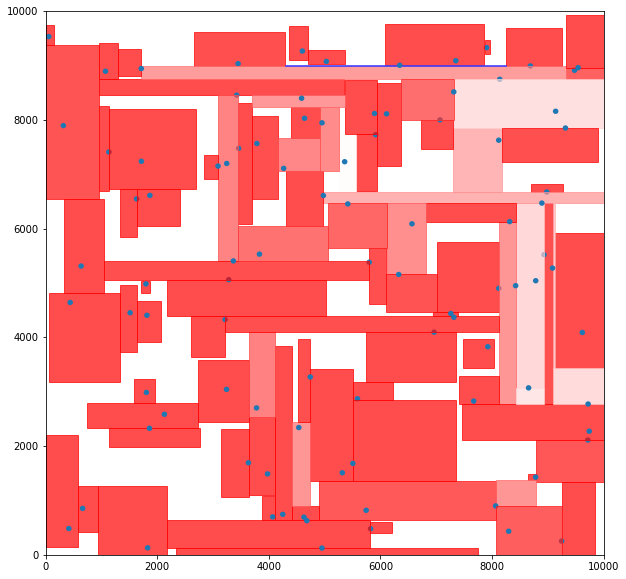

In [143]:
#定数など
start = time.time()
TIME_LIMIT = 10
random.seed(42)

UNDER = 0.8
DEBUG = True
DEBUG_SEARCH = False


if __name__ == "__main__":
    main(n,xyr)

In [2]:
%%timeit

for i in range(10**6):
    time.time()

205 ms ± 7.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [239]:
# 複数回テスト
for _ in range(10):
    # deta生成
#     n = 200
    n = int(50 * 4 ** random.random())

    x = random.sample(range(10000), k=n)
    y = random.sample(range(10000), k=n)
    q = random.sample(range(100000000), k=n-1)
    q += [0, 100000000]
    q.sort()
    r = []
    for i in range(n):
        r.append(q[i+1] - q[i])

    xyr = []
    for xi,yi,ri in zip(x,y,r):
        xyr += [xi,yi,ri]
    
    #定数など
    start = time.time()
    TIME_LIMIT = 20
    random.seed(42)

    UNDER = 0.8
    DEBUG = False
    DEBUG_SEARCH = False


    if __name__ == "__main__":
        print(n,*main(n,xyr))

121 0.9374006253424013 229
83 0.9659617637957729 412
64 0.9289344295948193 639
79 0.9558899031867264 438
55 0.9279602673115017 801
119 0.9485942361244494 236
124 0.9555753908309251 210
88 0.9576651667990839 379
129 0.9433835629619257 190
63 0.9628079762362398 573


In [46]:
def main_once(*args):
    # 入力
    if len(args) == 0:
        n,*xyr = map(int,read().split())
    else:
        n = args[0]
        xyr = args[1]
    
    # 変数準備
    xy = []
    r = []
    it = iter(xyr)
    for xi,yi,ri in zip(it,it,it):
        xy.append([xi,yi])
        r.append(ri)
    res = []
    res_score = 0
    cyc = 0
    under = [0] * n
    
    while time.time() - start < TIME_LIMIT:
        # 出力作成
#         if cyc == 0:
#             res2, score, score_i, iter_cnt = search_all(n,xy,r,under,cyc)
#         else:
#             res2, score, score_i, iter_cnt = search_on_the_way(n,xy,r,under,cyc,res,0.1,0.7)
        res2, score, score_i, iter_cnt = search_all_4edge(n,xy,r,under,cyc)  
        # 更新
        if score > res_score:
            res,res2 = res2,res
            res_score = score
        for i in range(n):
            if score_i[i] < UNDER:
                under[i] += 1
        
        # デバッグ用出力
        if DEBUG:
            print(cyc, res_score/n)
            pass
        
        cyc += 1
        break
        
    # 解答出力
    print('\n'.join(map(lambda x: ' '.join(map(str,x)), res)))
    
    # デバッグ用出力
    if DEBUG:
        print(res_score / n)
        print(cyc)
        print(under)
        visualize(res, xy, r)

    return [res_score / n, cyc]

0 100 7.871478885362236
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


C:\Users\scare\Anaconda3\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


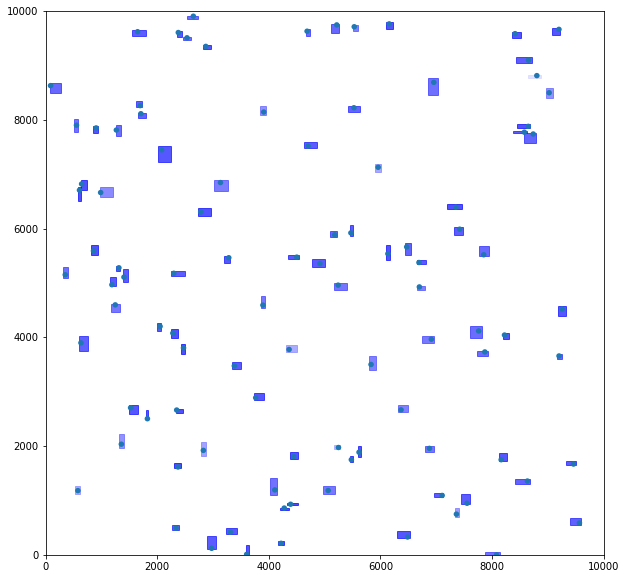

0 200 16.258878924802932
[1, 1, 2, 2, 3, 2, 1, 3, 2, 1, 2, 1, 1, 1, 3, 5, 1, 2, 5, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 4, 2, 1, 3, 3, 1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 4, 1, 2, 1, 3, 1, 3, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 4, 1, 4, 2, 2, 1, 2, 5, 2, 1, 1, 1, 1]


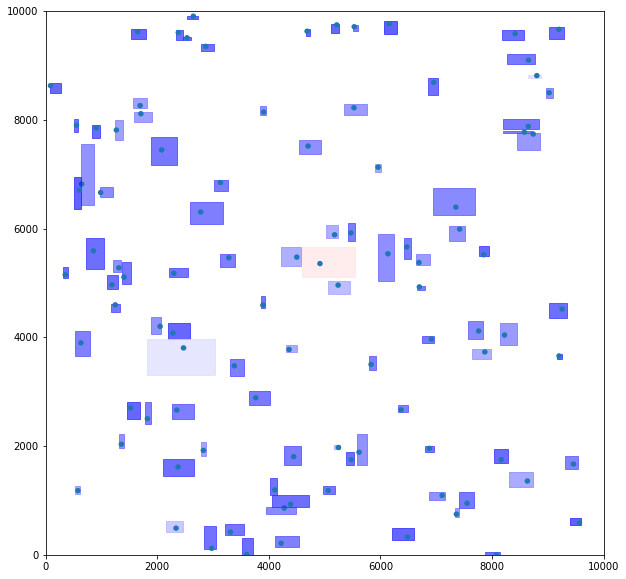

0 300 31.67482861195573
[1, 2, 3, 2, 4, 3, 1, 5, 2, 1, 3, 1, 1, 2, 5, 5, 2, 2, 5, 5, 3, 5, 2, 5, 3, 3, 4, 2, 3, 1, 5, 3, 4, 4, 2, 4, 2, 5, 5, 4, 2, 3, 5, 1, 5, 4, 4, 4, 2, 2, 2, 1, 2, 2, 3, 2, 3, 5, 2, 5, 2, 2, 2, 5, 2, 3, 2, 5, 3, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 4, 3, 3, 4, 3, 3, 2, 4, 5, 2, 5, 5, 3, 1, 3, 5, 3, 1, 2, 2, 2]


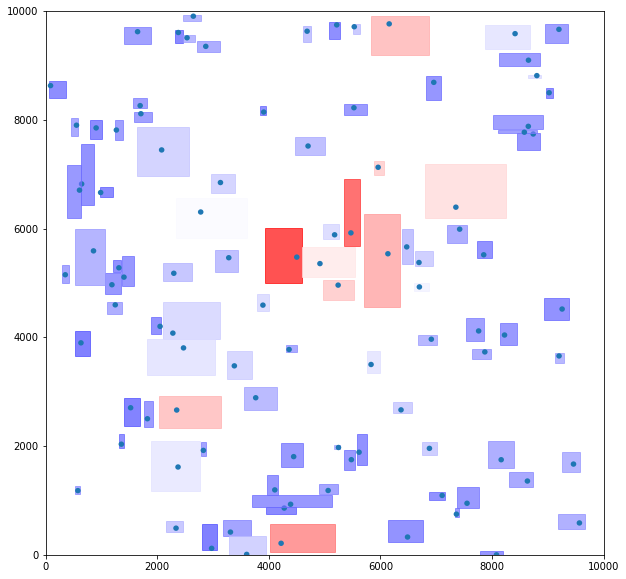

0 400 52.02304198010753
[2, 3, 5, 4, 5, 4, 2, 5, 4, 2, 5, 3, 2, 2, 5, 5, 3, 4, 8, 5, 4, 5, 4, 6, 5, 5, 5, 4, 5, 1, 5, 4, 5, 5, 2, 5, 3, 5, 5, 5, 3, 5, 5, 2, 5, 5, 4, 5, 2, 3, 3, 2, 4, 3, 4, 2, 4, 5, 2, 5, 3, 4, 3, 5, 2, 4, 4, 6, 5, 2, 3, 5, 3, 5, 3, 3, 5, 3, 3, 5, 4, 5, 5, 4, 4, 3, 5, 5, 2, 6, 5, 4, 3, 5, 8, 5, 1, 3, 3, 3]


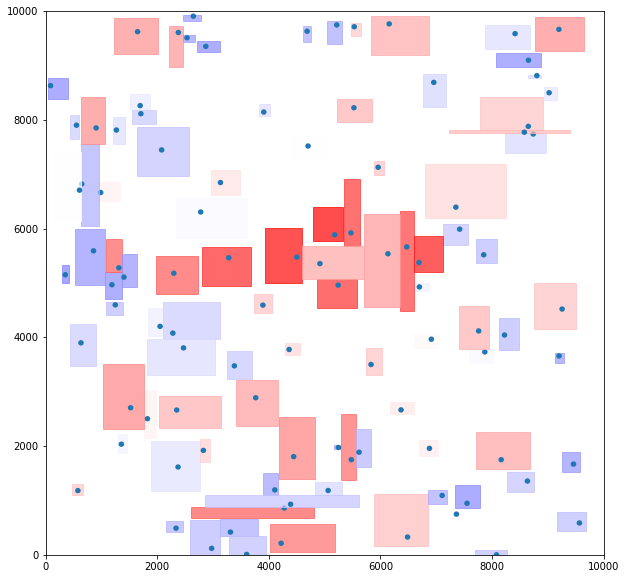

0 500 72.07025333266614
[2, 4, 5, 5, 5, 4, 3, 7, 4, 3, 5, 3, 3, 3, 8, 6, 5, 5, 8, 6, 5, 5, 5, 8, 5, 6, 5, 5, 6, 2, 7, 5, 5, 5, 4, 9, 5, 6, 9, 5, 4, 5, 5, 3, 5, 5, 5, 6, 3, 5, 5, 3, 5, 3, 4, 3, 5, 5, 4, 7, 5, 5, 4, 8, 3, 5, 5, 6, 5, 3, 4, 8, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 6, 4, 7, 5, 5, 3, 5, 8, 5, 2, 3, 5, 4]


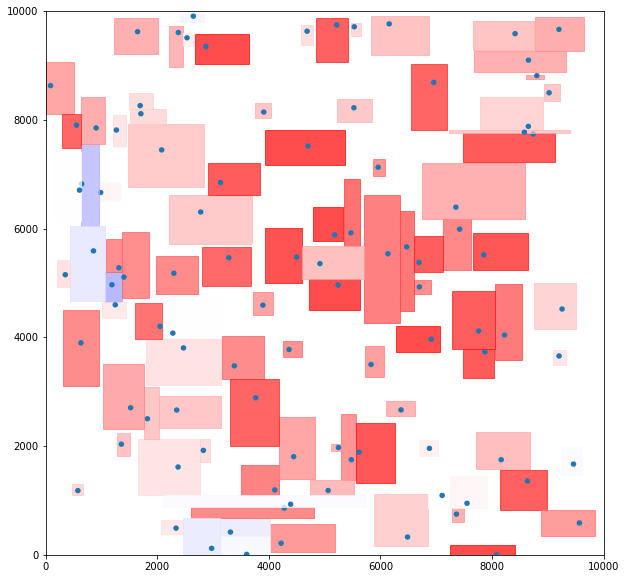

0 600 82.79686361538195
[3, 4, 5, 5, 7, 4, 4, 16, 4, 3, 5, 5, 4, 5, 8, 7, 5, 5, 8, 7, 5, 5, 5, 8, 6, 6, 7, 5, 7, 3, 9, 5, 5, 5, 4, 9, 5, 10, 16, 5, 5, 5, 7, 3, 6, 6, 6, 6, 4, 5, 5, 4, 5, 4, 4, 4, 6, 5, 5, 10, 5, 7, 4, 8, 4, 5, 6, 10, 5, 4, 5, 8, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 7, 5, 18, 6, 5, 5, 5, 8, 5, 2, 4, 5, 4]


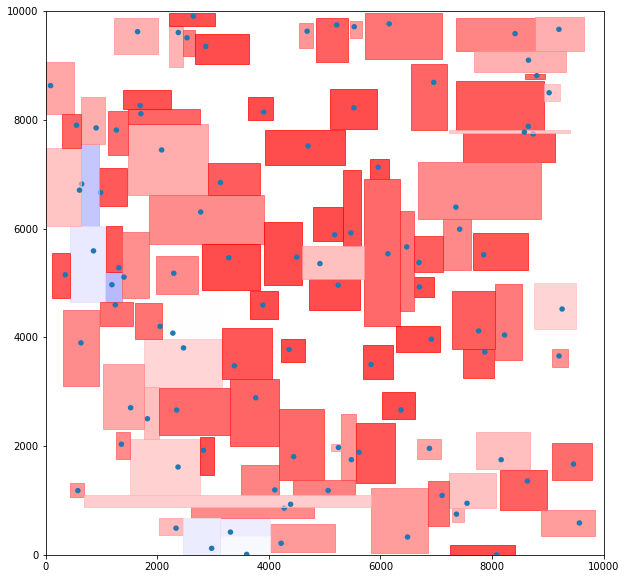

0 700 89.72241741996676
[4, 4, 7, 5, 8, 4, 4, 16, 4, 4, 7, 5, 4, 5, 8, 7, 8, 5, 8, 7, 5, 6, 5, 8, 6, 7, 9, 6, 7, 3, 10, 8, 6, 6, 4, 9, 5, 10, 16, 7, 5, 5, 8, 4, 6, 6, 7, 8, 4, 5, 8, 4, 5, 4, 4, 4, 10, 5, 5, 10, 5, 7, 4, 8, 4, 5, 8, 10, 6, 4, 5, 8, 4, 5, 4, 5, 17, 5, 5, 5, 6, 6, 7, 6, 5, 4, 5, 12, 5, 18, 8, 7, 5, 6, 8, 7, 4, 4, 5, 4]


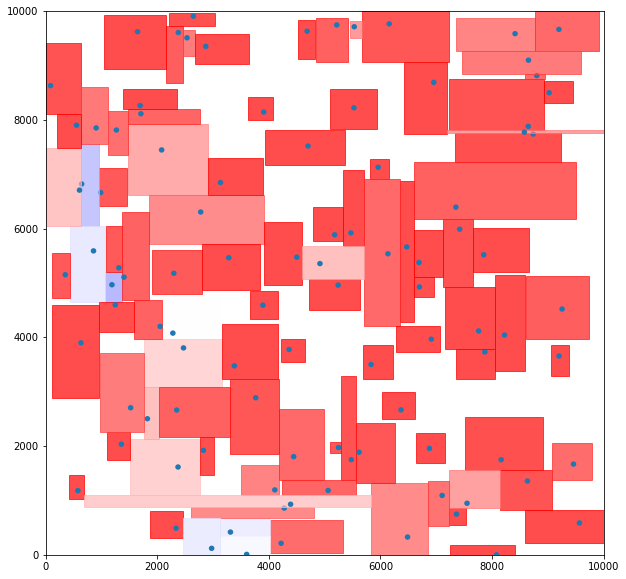

0 800 91.87928819965373
[4, 4, 7, 5, 10, 4, 4, 16, 4, 4, 9, 6, 4, 5, 8, 7, 8, 5, 8, 10, 5, 7, 5, 8, 7, 7, 9, 6, 7, 4, 10, 8, 6, 6, 4, 9, 6, 10, 16, 7, 5, 12, 8, 4, 6, 7, 7, 9, 4, 5, 8, 4, 5, 4, 4, 4, 10, 5, 6, 10, 5, 9, 4, 8, 4, 5, 9, 10, 6, 4, 5, 8, 4, 5, 4, 5, 17, 7, 6, 5, 6, 10, 16, 10, 5, 4, 5, 18, 5, 18, 9, 10, 5, 7, 8, 17, 4, 4, 5, 4]


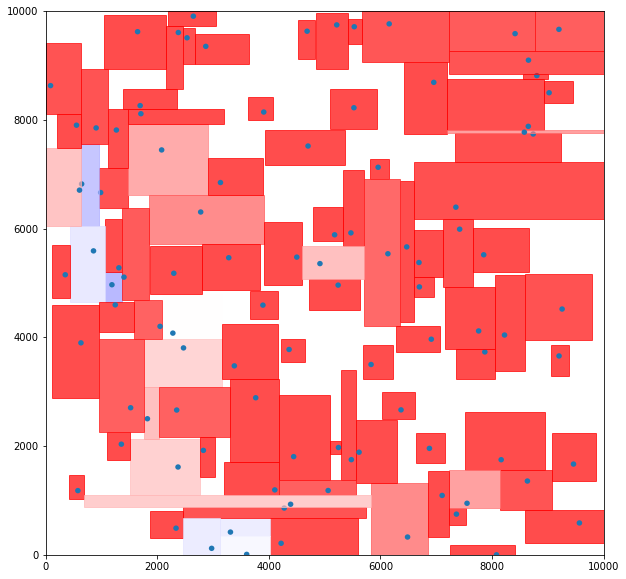

0 0.9193459141141751
425 1022 680 1463
7240 0 8411 185
5288 1370 5563 3405
7360 3238 8053 3789
7202 7817 8925 8750
3940 7165 5367 7819
4225 3540 4645 3963
1518 1108 2774 2122
5095 7838 5932 8574
8925 8307 9451 8713
2160 8561 2465 9726
957 6387 1469 7122
3631 7996 4068 8423
2202 9726 3052 10000
2091 3970 3164 4800
1767 3088 3164 3970
0 8104 637 9581
7332 7224 9240 7758
637 6051 957 7560
7238 9271 8769 10000
8053 3386 8597 5156
4018 0 5593 673
124 2887 959 4587
1069 4655 1364 5199
1069 5199 1364 6175
7153 3789 8053 4918
5827 0 6853 1322
1578 3970 2091 4687
1767 2122 2039 3088
8548 8750 9011 8845
1469 6618 2908 7931
7115 4918 7667 6174
1878 4800 2800 5687
7513 1569 8948 2634
6602 4739 6955 5105
3119 350 4018 673
3197 1108 4184 1701
1845 5710 3921 6618
434 4655 1069 6051
6351 4274 6602 6876
959 4102 1578 4655
2466 673 5827 879
2039 2176 3302 3088
7222 547 7535 852
5330 5684 5714 7076
4184 1370 5090 2941
3164 3225 4174 4242
3302 1701 4184 3225
9054 3297 9382 3859
4845 8931 5416 9971
8144 82

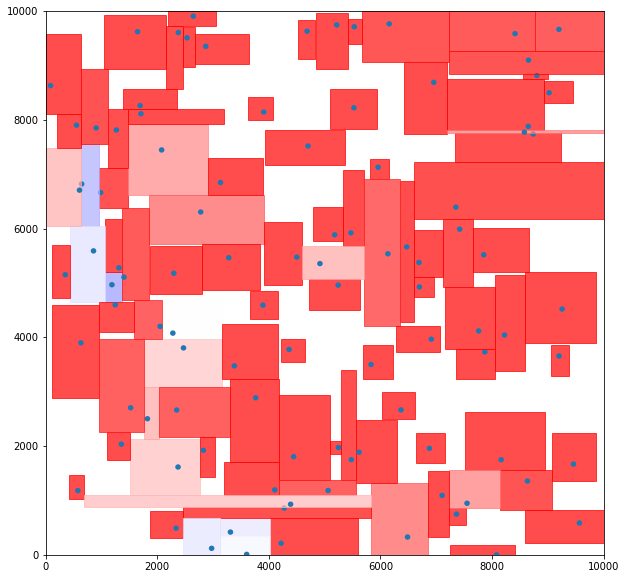

In [84]:
#定数など
start = time.time()
TIME_LIMIT = 3
random.seed(42)

UNDER = 0.8
DEBUG = True
DEBUG_SEARCH = True


if __name__ == "__main__":
    main_once(n,xyr)

In [92]:
random.sample(range(4), k=4)

[2, 1, 3, 0]